# **Proyecto Final - Segunda Entrega**

### Archivo: ProyectoParteIIIMolle.ipynb
<br>

---
<br>

## **📝 Introducción**

#### Este trabajo complementa el análisis previo sobre los idiomas más aprendidos en Duolingo entre 2020 y 2024. En el primer informe se realizaron visualizaciones y conclusiones descriptivas. En esta segunda parte, se busca aplicar técnicas de ciencia de datos para entrenar un modelo predictivo. El objetivo es explorar si es posible predecir el ranking de popularidad de un idioma en función de variables como país, idioma y año. Para ello, se aplican métodos de selección de características, entrenamiento de un modelo de regresión lineal, evaluación de métricas y generación de visualizaciones que ilustran el rendimiento del modelo.
<br>

---
<br>
<br>

## **📈 Predicción**

#### ¿Es posible predecir qué puesto podría ocupar un idioma en el ranking de popularidad, según variables como país, año e idioma? A continuación, se detalla el proceso metodológico implementado para explorar esta posibilidad.
<br>

### 1. Preparación del dataset


In [1]:
import pandas as pd

df = pd.read_excel("Duolingo_Language_Ranking_Cleaned.xlsx")
df.head()

,Country,Year,Popularity_Ranking,Language
0,Afghanistan,2020,1,English
1,Afghanistan,2021,1,English
2,Afghanistan,2022,1,German
3,Afghanistan,2023,1,English
4,Afghanistan,2024,1,English


<br>

### 2. Codificación de variables categóricas

In [2]:
df_encoded = pd.get_dummies(df, columns=["Language", "Country"])

In [3]:
X = df_encoded.drop(columns=["Popularity_Ranking"])
y = df_encoded["Popularity_Ranking"]

<br>

### 3. Feature Selection (Selección de características)

In [4]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

#### Se aplicó el método SelectKBest con la función f_regression para seleccionar las 5 variables más relevantes en relación con la variable objetivo. Es decir que la finalidad era identificar qué variables tienen mayor relación estadística con el ranking de popularidad.
<br>

### 4. Entrenamiento del modelo de regresión lineal

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Se entrenó un modelo de regresión lineal para predecir el ranking de popularidad de los idiomas según país, idioma y año. Se eligió regresión (no clasificación) porque la variable objetivo es numérica (el ranking).
<br>

### 5. Evaluación del modelo con métricas básicas

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 0.14788441609972827
R²: 0.4078900797787032


#### El modelo obtuvo un error cuadrático medio (MSE) de 0.1478 y un coeficiente de determinación (R²) de 0.4079. Esto indica que el modelo logra explicar aproximadamente el 40% de la variabilidad del ranking de popularidad, lo cual podría significar un resultado aceptable considerando la simplicidad del modelo y el tamaño limitado del dataset. Los errores son relativamente bajos, lo que sugiere que el modelo predice con cierta precisión en varios casos, aunque aún haya capacidad para mejorar y obtener resultados más precisos.
<br>

### 6. Conclusión técnica sobre el rendimiento del modelo.

#### El modelo de regresión lineal permitió explorar la posibilidad de predecir el ranking de popularidad de un idioma en función de variables como país, idioma y año. A partir de la aplicación de SelectKBest se identificaron las características más relevantes y se entrenó un modelo que logró un desempeño razonable. El error cuadrático medio (MSE) fue de aproximadamente 0.15 y el coeficiente de determinación (R²) alcanzó un valor cercano a 0.41, lo que indica que el modelo logra explicar alrededor del 40% de la variabilidad en el ranking. Si bien no se alcanzó una alta precisión, el proceso permitió aplicar técnicas fundamentales de ciencia de datos, interpretar resultados y detectar las limitaciones inherentes al dataset. Para mejorar el modelo, sería necesario contar con más datos y con variables numéricas directamente relacionadas con el uso de idiomas en Duolingo, como cantidad de usuarios, tiempo promedio de uso o frecuencia de acceso.
<br>
<br>

## **📊 Visualizaciones complementarias del análisis**

### Gráfico 1 – Dispersión: ranking real vs predicho

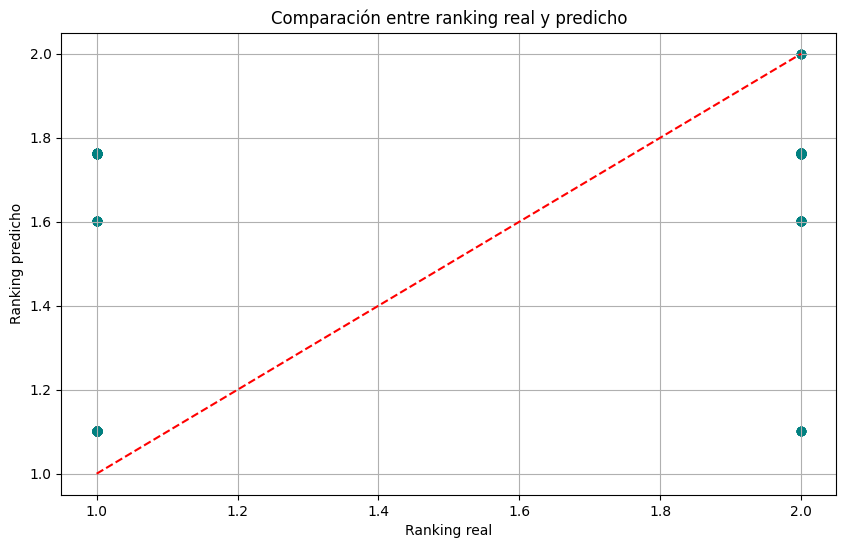

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Ranking real")
plt.ylabel("Ranking predicho")
plt.title("Comparación entre ranking real y predicho")
plt.grid(True)
plt.show()

#### El gráfico muestra la relación entre los valores reales del ranking de popularidad y los valores predichos por el modelo de regresión lineal. Cada punto representa una observación del conjunto de prueba. La línea roja punteada indica una predicción perfecta (donde el valor predicho coincide exactamente con el real). La dispersión de los puntos alrededor de esta línea refleja el grado de error del modelo. En este caso, se observa una dispersión considerable, lo que confirma que el modelo tiene una capacidad predictiva limitada, probablemente debido al tamaño reducido del dataset y la falta de variables numéricas más informativas.
<br>

### Gráfico 2 - Histograma de errores

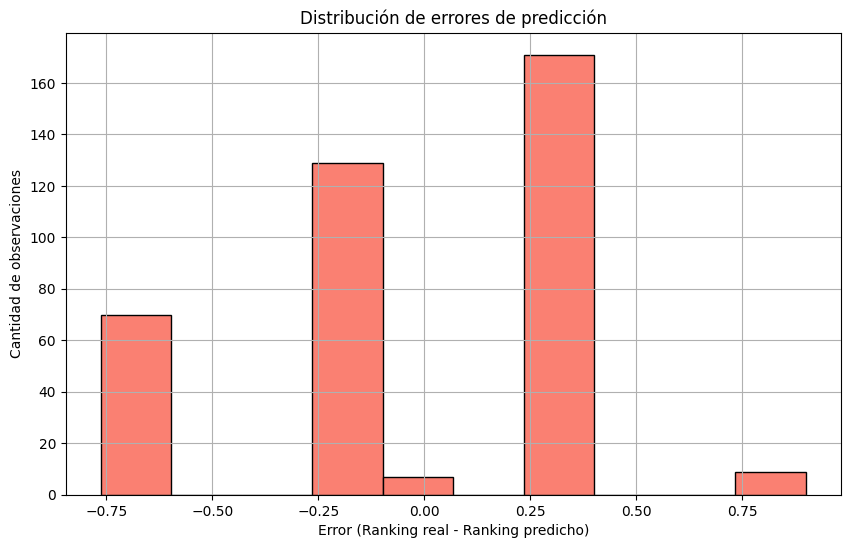

In [12]:
import numpy as np

errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=10, color='salmon', edgecolor='black')
plt.title("Distribución de errores de predicción")
plt.xlabel("Error (Ranking real - Ranking predicho)")
plt.ylabel("Cantidad de observaciones")
plt.grid(True)
plt.show()

#### El histograma muestra la distribución de los errores entre los valores reales y los predichos por el modelo. La mayoría de los errores se concentran cerca de cero, lo que indica que el modelo acertó en algunos casos. Sin embargo, también hay errores más grandes, lo que refuerza la conclusión de que el modelo tiene una capacidad predictiva limitada.
<br>

---
<br>
<br>

## **📍 Reflexión final**

#### A pesar de las limitaciones del dataset, como su tamaño reducido y la falta de variables numéricas más informativas, se logró aplicar correctamente el proceso de modelado: selección de variables, entrenamiento, evaluación y visualización. El modelo de regresión lineal mostró una capacidad predictiva razonable, alcanzando un coeficiente de determinación (R²) de aproximadamente 0.41. Esto indica que, dentro del contexto del dataset disponible, el modelo logra explicar una parte significativa de la variabilidad del ranking. Si bien no se logró construir una herramienta de predicción precisa, el ejercicio permitió aplicar de forma práctica las técnicas aprendidas de ciencias de datos y reflexionar sobre los desafíos del modelado con datos reales. Para mejorar el análisis, sería necesario incorporar datos como cantidad de usuarios por idioma, frecuencia de uso o duración del aprendizaje, lo que permitiría construir modelos más rigurosos y confiables.